In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import nltk
from nltk.corpus import stopwords
import string
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import to_categorical
# from keras.layers import Input, Dense, Dropout, Embedding, LSTM
# from keras.layers.merge import add

In [2]:
f = open("wordtoidx.pkl", "rb")
word_to_idx = pickle.load(f)
f.close()

In [3]:
f = open("idxtoword.pkl", "rb")
idx_to_word = pickle.load(f)
f.close()

In [4]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalisation
    img = preprocess_input(img)
    return img

In [5]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    
    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [6]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model_new = Model(model.input,model.layers[-2].output)

In [7]:
model = load_model('./model_weights/model_9.h5')

In [8]:
# predict
def predict_caption(photo):
    max_len = 35
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

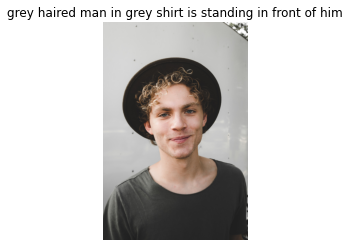

In [10]:
photo = encode_image('test2.jpg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("test2.jpg")
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show()